In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop


In [5]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale=1/255)

In [6]:
train_dataset = train.flow_from_directory('E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/training/',
                                         target_size = (200,200),
                                         batch_size = 3,shuffle=True,
                                         class_mode= 'binary')

Found 5364 images belonging to 2 classes.


In [7]:
validation_dataset = validation.flow_from_directory('E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,shuffle=True,
                                         class_mode= 'binary')

Found 887 images belonging to 2 classes.


In [8]:
train_dataset.class_indices

{'human': 0, 'nonhuman': 1}

In [9]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
tf.keras.layers.MaxPooling2D(2, 2),

tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),

tf.keras.layers.Flatten(),

tf.keras.layers.Dense(512, activation='relu'),

tf.keras.layers.Dense(1, activation='sigmoid')])

In [12]:

model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [14]:

model.fit = model.fit(train_dataset,
                     steps_per_epoch = 15,
                     epochs= 10,
                     validation_data=validation_dataset)                                                           
                                                           

Epoch 1/10
15/15 [==============================] - 13s 896ms/step - loss: 0.6229 - accuracy: 0.6444 - val_loss: 0.5970 - val_accuracy: 0.7655
Epoch 2/10
15/15 [==============================] - 12s 807ms/step - loss: 0.8452 - accuracy: 0.6667 - val_loss: 0.5774 - val_accuracy: 0.7125
Epoch 3/10
15/15 [==============================] - 14s 953ms/step - loss: 0.6131 - accuracy: 0.7556 - val_loss: 0.5233 - val_accuracy: 0.7328
Epoch 4/10
15/15 [==============================] - 13s 914ms/step - loss: 0.4963 - accuracy: 0.7556 - val_loss: 0.5292 - val_accuracy: 0.7373
Epoch 5/10
15/15 [==============================] - 12s 847ms/step - loss: 0.4795 - accuracy: 0.7556 - val_loss: 0.6001 - val_accuracy: 0.7576
Epoch 6/10
15/15 [==============================] - 12s 810ms/step - loss: 0.3281 - accuracy: 0.9333 - val_loss: 0.4409 - val_accuracy: 0.8005
Epoch 7/10
15/15 [==============================] - 13s 924ms/step - loss: 0.3554 - accuracy: 0.8444 - val_loss: 0.5517 - val_accuracy: 0.7644

In [ ]:
validation_dataset.class_indices

In [12]:
dir_path = 'E:/MASABAH/MS DS 2k21/Fall 2021/Machine Learning/proj/Periocular_recog/testing/'

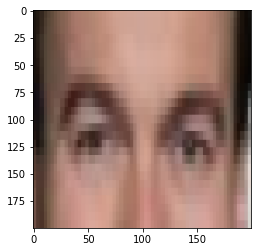

Human


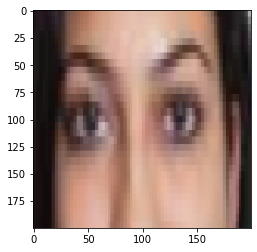

Human


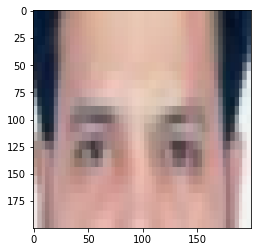

Human


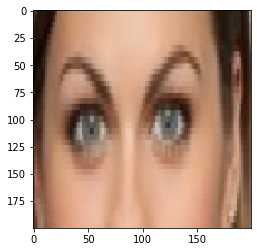

Human


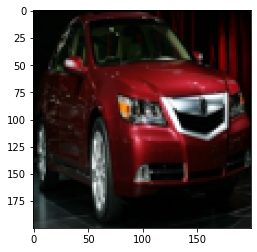

Not Human


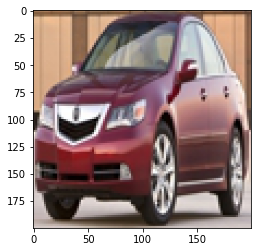

Not Human


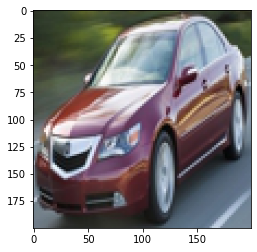

Not Human


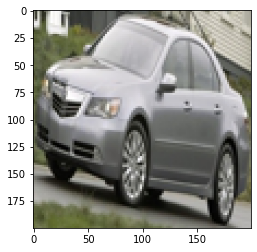

Not Human


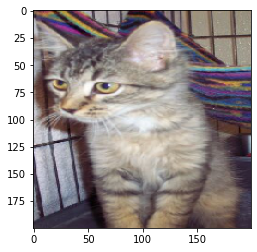

Not Human


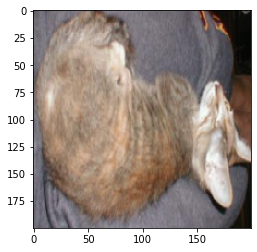

Not Human


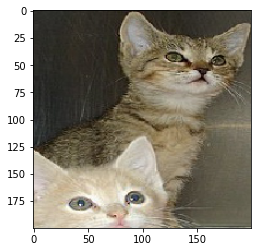

Not Human


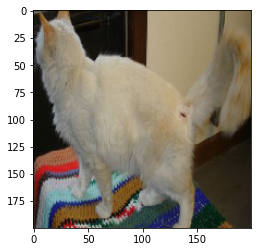

Not Human


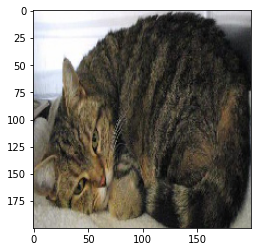

Not Human


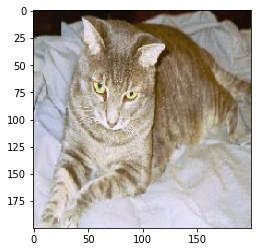

Not Human


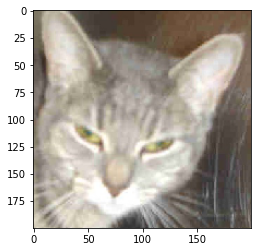

Human


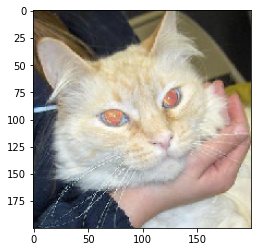

Not Human


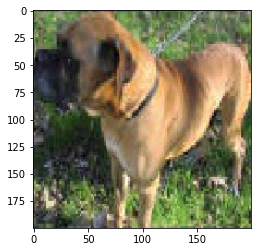

Not Human


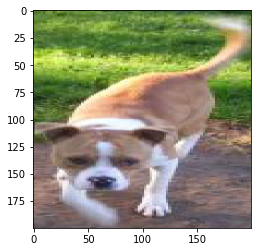

Not Human


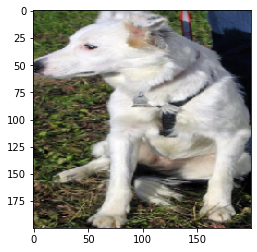

Not Human


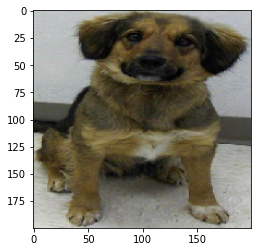

Not Human


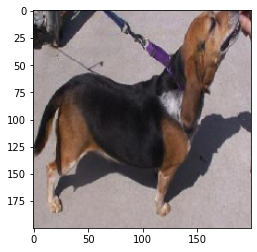

Not Human


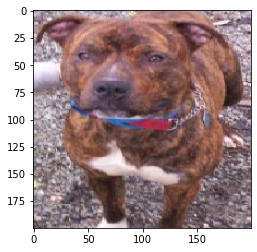

Not Human


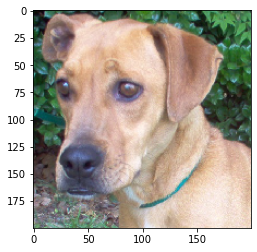

Not Human


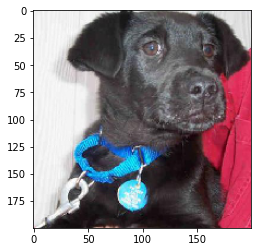

Not Human


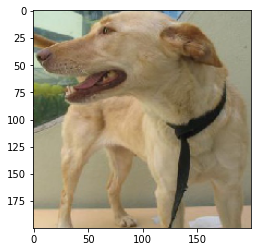

Human


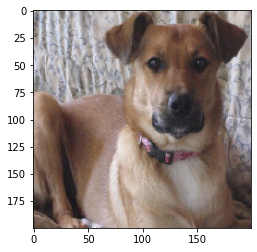

Human


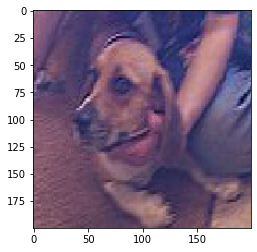

Not Human


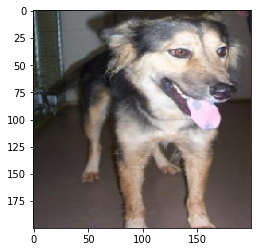

Not Human


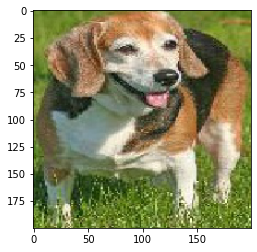

Not Human


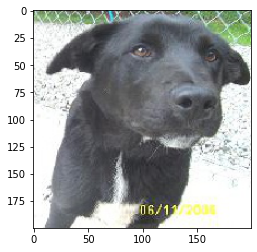

Not Human


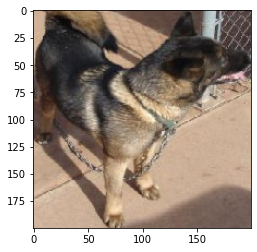

Not Human


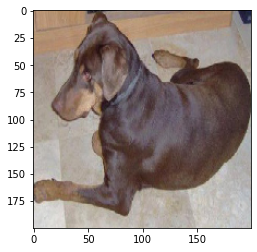

Not Human


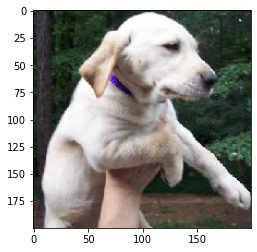

Not Human


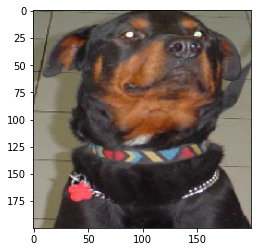

Not Human


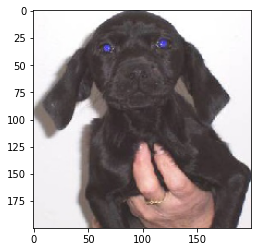

Not Human


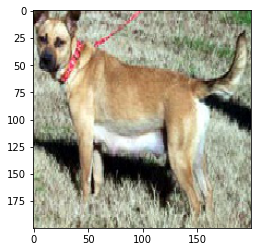

Not Human


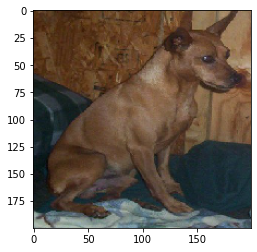

Not Human


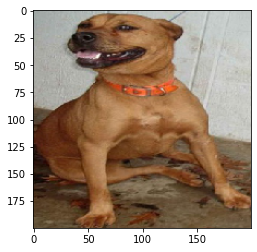

Not Human


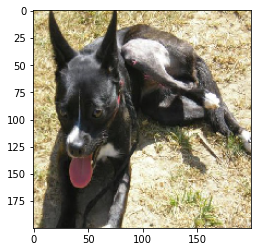

Not Human


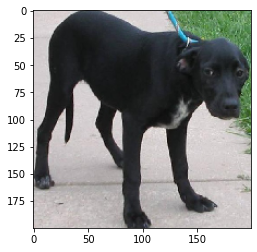

Not Human


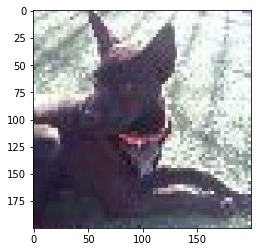

Not Human


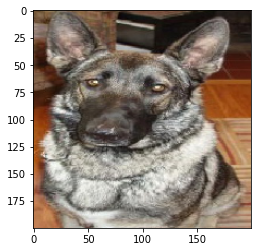

Not Human


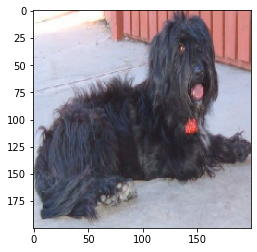

Not Human


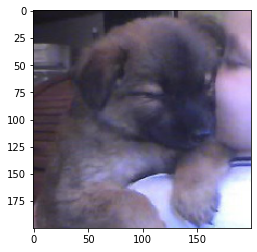

Not Human


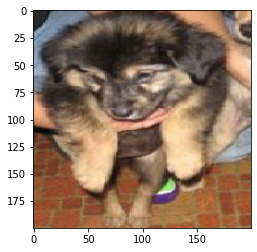

Not Human


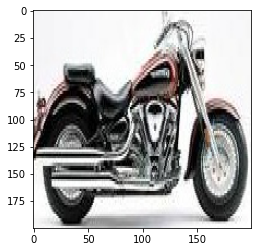

Not Human


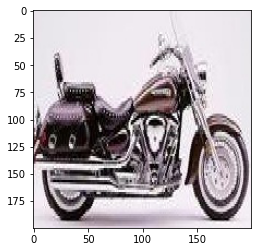

Not Human


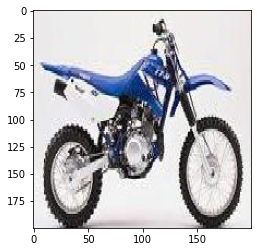

Not Human


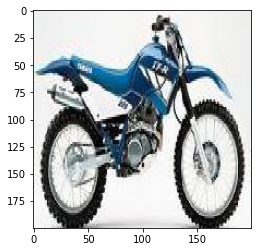

Not Human


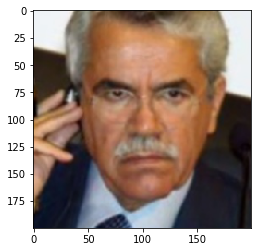

Not Human


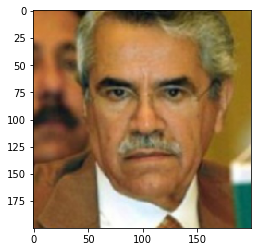

Not Human


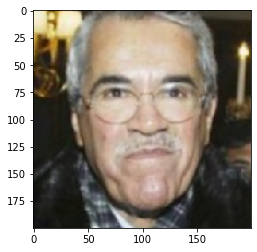

Not Human


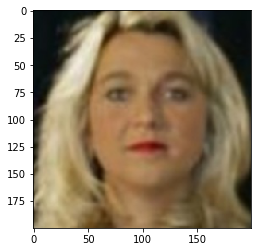

Not Human


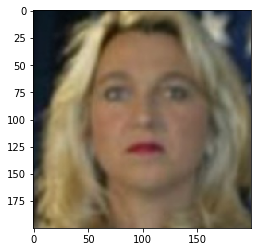

Not Human


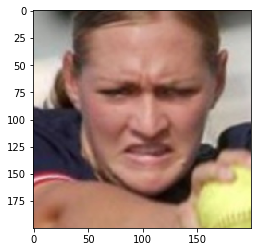

Not Human


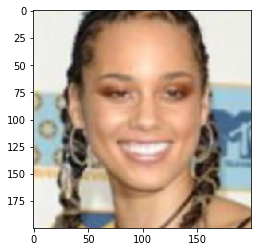

Not Human


In [13]:
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size = (200,200))
    plt.imshow(img)
    plt.show()
    
    X= image.img_to_array(img)
    X=np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print("Human")
    else:
        print("Not Human")

In [15]:
model.evaluate(validation_dataset)

296/296 [==============================] - 15s 50ms/step - loss: 0.4007 - accuracy: 0.8512


[0.40065622329711914, 0.8511837720870972]

In [16]:
model.evaluate(train_dataset)

1788/1788 [==============================] - 97s 54ms/step - loss: 0.4273 - accuracy: 0.8311


[0.4273016154766083, 0.8310961723327637]